In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv


In [117]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

from textblob import TextBlob
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
tweet_df = pd.read_csv('../input/all-covid19-vaccines-tweets/vaccination_all_tweets.csv')
tweet_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [119]:
tweet_df.shape

(228207, 16)

In [120]:
tweet_df = tweet_df[tweet_df['user_location'].str.contains("India", case=False, na=False)]
tweet_df


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
23,1337773751841144833,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,2020-12-12 14:58:11,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False
51,1338631874814619653,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,2013-12-30 08:51:23,855,3046,8236,False,2020-12-14 23:48:04,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False
75,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False
94,1338551175587786752,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14 18:27:23,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228201,1460178320209825793,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:30:14,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVAXIN']",VaxBlr,0,0,False
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False


In [121]:
tweet_df = tweet_df[['user_name', 'date', 'text']]
tweet_df.user_name = tweet_df.user_name.astype('category')
tweet_df.user_name = tweet_df.user_name.cat.codes
tweet_df.date = pd.to_datetime(tweet_df.date).dt.date
tweet_df = tweet_df.drop_duplicates('text')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45014 entries, 12 to 228206
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  45014 non-null  int16 
 1   date       45014 non-null  object
 2   text       45014 non-null  object
dtypes: int16(1), object(2)
memory usage: 1.1+ MB


In [123]:
tweet_df.isna().sum()

user_name    0
date         0
text         0
dtype: int64

In [124]:
texts = tweet_df['text']
texts.head()

12    The agency also released new information for h...
23    The US Food and Drug Administration (FDA) has ...
51    I’ve never been so excited to get a vaccine 💉💉...
75    #UgurSahin #ozlemtureci the #Muslim Scientists...
94    Toronto to receive Ontario's 1st doses of Pfiz...
Name: text, dtype: object

In [125]:
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr.head()

12    The agency also released new information for h...
23    The US Food and Drug Administration (FDA) has ...
51    I’ve never been so excited to get a vaccine 💉💉...
75    #UgurSahin #ozlemtureci the #Muslim Scientists...
94    Toronto to receive Ontario's 1st doses of Pfiz...
Name: text, dtype: object

In [126]:
to_lower = lambda x : x.lower()
texts_lc = texts_lr.apply(to_lower)
texts_lc.head()

12    the agency also released new information for h...
23    the us food and drug administration (fda) has ...
51    i’ve never been so excited to get a vaccine 💉💉...
75    #ugursahin #ozlemtureci the #muslim scientists...
94    toronto to receive ontario's 1st doses of pfiz...
Name: text, dtype: object

In [127]:
rmv_pcs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
texts_pcs = texts_lc.apply(rmv_pcs)
texts_pcs

12        the agency also released new information for h...
23        the us food and drug administration fda has gr...
51        i’ve never been so excited to get a vaccine 💉💉...
75        ugursahin ozlemtureci the muslim scientists hu...
94        toronto to receive ontarios 1st doses of pfize...
                                ...                        
228201    1844 urban bengaluru covidvaccine availability...
228202    45 urban bengaluru covidvaccine availability f...
228203    1844 bbmp bengaluru covidvaccine availability ...
228204    1844 urban bengaluru covidvaccine availability...
228206    45 urban bengaluru covidvaccine availability f...
Name: text, Length: 45014, dtype: object

In [128]:
update_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(update_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_rs = texts_pcs.apply(remove_words)
texts_rs.head()

12    agency also released new information health ca...
23    us food drug administration fda granted emerge...
51    i’ve never excited get vaccine 💉💉💉 covidvaccin...
75    ugursahin ozlemtureci muslim scientists husban...
94    toronto receive ontarios 1st doses pfizer vacc...
Name: text, dtype: object

(-0.5, 999.5, 499.5, -0.5)

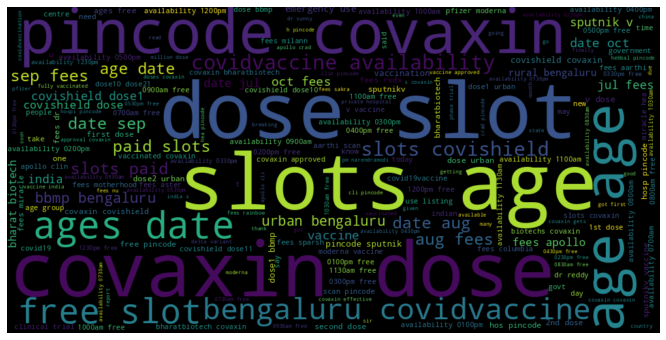

In [129]:
words = ' '.join([word for word in texts_rs])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

### Text Analysis

In [130]:
word_list = [word for line in texts_rs for word in line.split()]
word_list[:10]

['agency',
 'also',
 'released',
 'new',
 'information',
 'health',
 'care',
 'providers',
 'patients',
 'us']

In [131]:
word_counts = Counter(word_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']

px.bar(words_df, x='word', y='freq', title='Most Common Words')

In [132]:
tweet_df.text = texts_rs
tweet_df.head()

,user_name,date,text
12,9179,2020-12-12,agency also released new information health ca...
23,1427,2020-12-12,us food drug administration fda granted emerge...
51,2594,2020-12-14,i’ve never excited get vaccine 💉💉💉 covidvaccin...
75,5943,2020-12-14,ugursahin ozlemtureci muslim scientists husban...
94,3386,2020-12-14,toronto receive ontarios 1st doses pfizer vacc...


In [133]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45014 entries, 12 to 228206
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  45014 non-null  int16 
 1   date       45014 non-null  object
 2   text       45014 non-null  object
dtypes: int16(1), object(2)
memory usage: 1.1+ MB


In [134]:
tweet_df['date'] = pd.to_datetime(tweet_df['date'], format='%Y-%m-%d')

### Sentiment Analysis

In [135]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = tweet_df.text.apply(ps)
sentiment_scores

12        {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...
23        {'neg': 0.191, 'neu': 0.662, 'pos': 0.147, 'co...
51        {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...
75        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
94        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
228201    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
228202    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
228203    {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...
228204    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
228206    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
Name: text, Length: 45014, dtype: object

In [136]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.789,0.211,0.4939
1,0.191,0.662,0.147,-0.1531
2,0.184,0.816,0.000,-0.2584
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [137]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,0.789,0.211,0.4939,positive
1,0.191,0.662,0.147,-0.1531,negative
2,0.184,0.816,0.000,-0.2584,negative
3,0.000,1.000,0.000,0.0000,neutral
4,0.000,1.000,0.000,0.0000,neutral


In [138]:
data = tweet_df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
12,9179,2020-12-12,agency also released new information health ca...,neutral
23,1427,2020-12-12,us food drug administration fda granted emerge...,neutral
51,2594,2020-12-14,i’ve never excited get vaccine 💉💉💉 covidvaccin...,neutral
75,5943,2020-12-14,ugursahin ozlemtureci muslim scientists husban...,negative
94,3386,2020-12-14,toronto receive ontarios 1st doses pfizer vacc...,neutral


In [139]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,neutral,1903
1,positive,1515
2,negative,300


<AxesSubplot:xlabel='index', ylabel='label'>

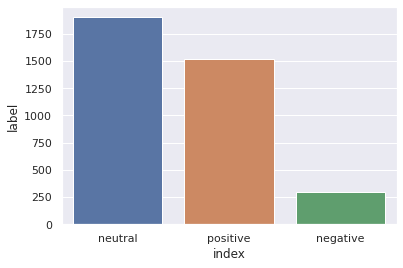

In [140]:
sns.barplot(data=counts_df, x='index', y='label')

In [141]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
data_agg.head()

,date,label,counts
0,2020-12-12,neutral,4
1,2020-12-13,negative,2
2,2020-12-13,neutral,2
3,2020-12-13,positive,4
4,2020-12-14,negative,3


In [142]:
px.line(data_agg, x='date', y='counts', color='label', title='COVID-19 Vaccines Sentiment Analysis')